In [1]:
import tensorflow as tf

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv


--2023-12-22 12:38:17--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv’

moore.csv           100%[===================>]   2.25K  --.-KB/s    in 0s      

2023-12-22 12:38:17 (34.7 MB/s) - ‘moore.csv’ saved [2302/2302]



In [5]:
data = pd.read_csv('moore.csv', header=None).to_numpy()

In [ ]:
data

In [8]:
data.size

324

In [17]:
X = data[:,0].reshape(-1,1)
Y = data[:,1]

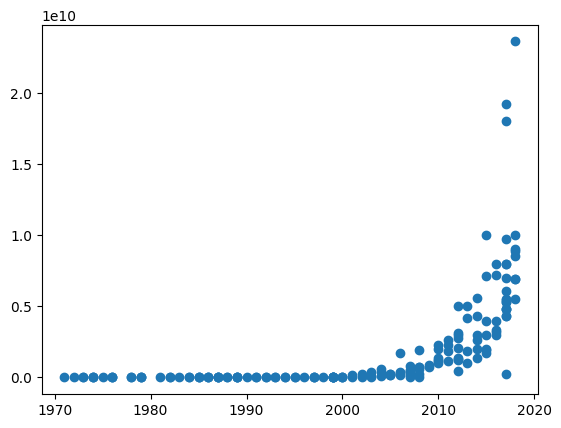

In [18]:
plt.scatter(X,Y)

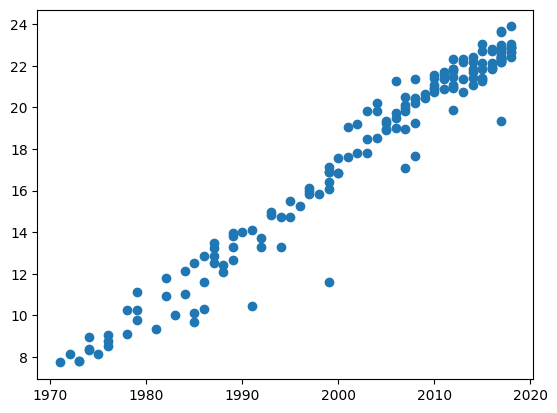

In [19]:
Y = np.log(Y)
plt.scatter(X,Y)

In [20]:
X = X - X.mean()

In [21]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(1),
])

In [22]:
model.compile(
    optimizer=tf.keras.optimizers.SGD(0.001, 0.9),
    loss='mse',
)

In [23]:
def schedule(epoch, lr):
  if epoch > 50:
    return 0.0001
  return 0.001

scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)

In [24]:
r = model.fit(X,Y, epochs=200, callbacks=[scheduler])

Epoch 1/200
6/6 [==============================] - 1s 5ms/step - loss: 329.4760 - lr: 0.0010
Epoch 2/200
6/6 [==============================] - 0s 4ms/step - loss: 312.5555 - lr: 0.0010
Epoch 3/200
6/6 [==============================] - 0s 4ms/step - loss: 340.2537 - lr: 0.0010
Epoch 4/200
6/6 [==============================] - 0s 4ms/step - loss: 208.2208 - lr: 0.0010
Epoch 5/200
6/6 [==============================] - 0s 6ms/step - loss: 250.9696 - lr: 0.0010
Epoch 6/200
6/6 [==============================] - 0s 4ms/step - loss: 196.0043 - lr: 0.0010
Epoch 7/200
6/6 [==============================] - 0s 4ms/step - loss: 133.3334 - lr: 0.0010
Epoch 8/200
6/6 [==============================] - 0s 3ms/step - loss: 301.5829 - lr: 0.0010
Epoch 9/200
6/6 [==============================] - 0s 3ms/step - loss: 308.2679 - lr: 0.0010
Epoch 10/200
6/6 [==============================] - 0s 3ms/step - loss: 333.6556 - lr: 0.0010
Epoch 11/200
6/6 [==============================] - 0s 3ms/step - los

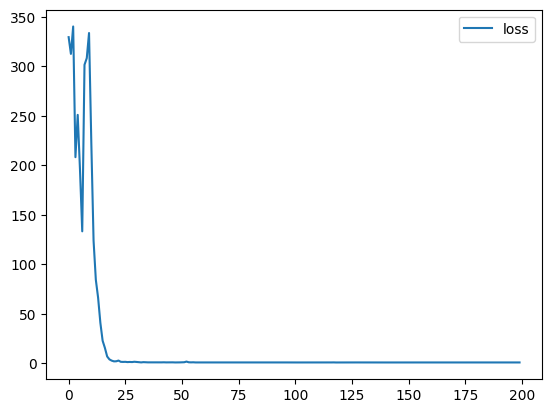

In [25]:
plt.plot(r.history['loss'], label='loss')
plt.legend()